In [4]:
pip install qiskit qiskit-ibm-provider qiskit-ibm-runtime


Note: you may need to restart the kernel to use updated packages.


In [113]:
from qiskit_ibm_runtime import QiskitRuntimeService
QiskitRuntimeService.save_account(channel="ibm_cloud", token="4PkG3WlXufZct6TqMYVREZ820GSfbt8G1RezJuKTT22O",overwrite=True)

import numpy as np
import matplotlib.pyplot as plt
import math

from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import array_to_latex, plot_histogram

In [80]:
n=2
grover_circuit=QuantumCircuit(2,2)

In [81]:
def initialize(qc, qubits):
    for q in qubits:
        qc.h(q)
    return qc

In [82]:
grover_circuit=initialize(grover_circuit, [0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])

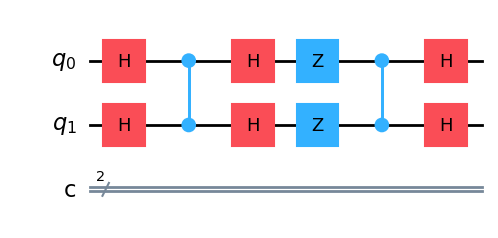

In [83]:
grover_circuit.draw('mpl')

In [84]:
from qiskit.quantum_info import Statevector
state_vector = Statevector(grover_circuit)
array_to_latex(state_vector)

<IPython.core.display.Latex object>

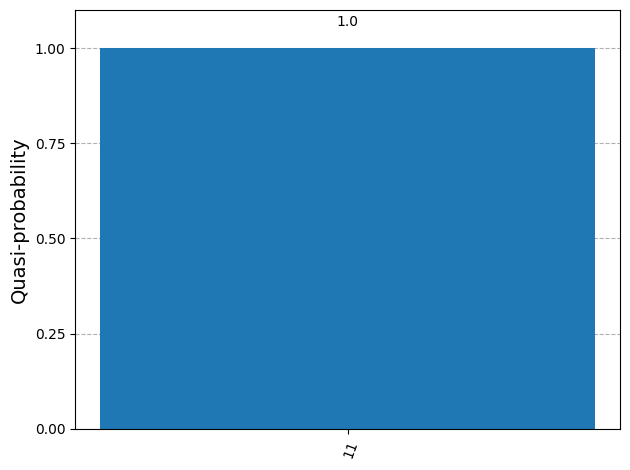

In [92]:
grover_circuit.measure_all()
sim_aer=AerSimulator()
from qiskit_aer.primitives import SamplerV2 as AerSampler
sampler=SamplerV2()
result=sampler.run([grover_circuit]).result()
counts=result[0].data.meas.get_counts()
total=sum(counts.values())
probabilities={bit: count/total for bit, count in counts.items()}
plot_histogram(probabilities)

In [104]:
service=QiskitRuntimeService()
backend=service.least_busy(operational=True, simulator=False, min_num_qubits=20)
print(f"backend: {backend.name}")

qiskit_runtime_service.__init__:WARNING:2025-12-16 23:26:06,112: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:WARNING:2025-12-16 23:26:06,727: Loading instance: open-instance, plan: open
qiskit_runtime_service.backends:WARNING:2025-12-16 23:26:10,005: Using instance: open-instance, plan: open


backend: ibm_torino


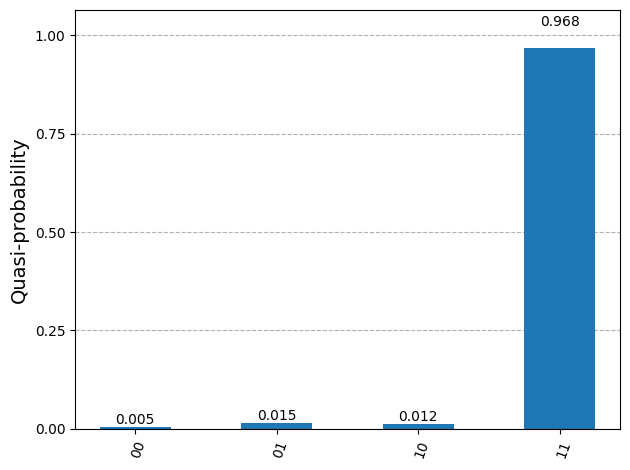

In [109]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
pm=generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit=pm.run(grover_circuit)
sampler=Sampler(mode=backend)
#sampler.options.twirling.enable_gates = False
#sampler.options.twirling.enable_measure = False
#sampler.options.dynamical_decoupling.enable = False
jobs=sampler.run([isa_circuit])
results=jobs.result()
answers=results[0].data.meas.get_counts()
total_hardware=sum(answers.values())
probabilities={bit: count/total_hardware for bit, count in answers.items()}
plot_histogram(probabilities)

Note: you may need to restart the kernel to use updated packages.


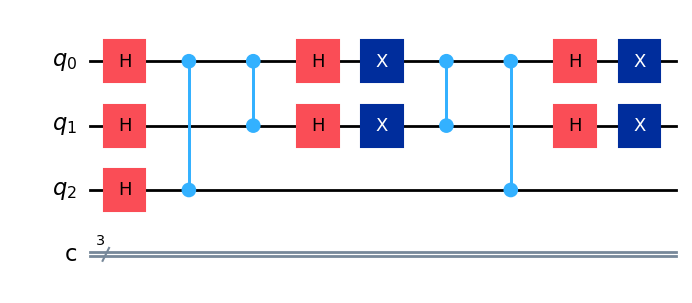

In [119]:
n=3
grover_circuit=QuantumCircuit(3,3)
grover_circuit=initialize(grover_circuit, [0,1,2])
grover_circuit.cz(0,2)
grover_circuit.cz(0,1)
for qubit in range(0,2):
    grover_circuit.h(qubit)
    grover_circuit.x(qubit)
grover_circuit.cz(0, [1,2])
for qubit in range(0,2):
    grover_circuit.h(qubit)
    grover_circuit.x(qubit)
grover_circuit.draw('mpl')